## Capstone DAB July 2025 KM

## Advanced Maternal Age (AMA) Outcomes

## Data Analysis

### 1. Loading Data: Import all CSV files into Pandas DataFrames and display the first few rows of each.

### 2. Exploratory Analysis: Use descriptive statistics to get a feel for the data:

    #### Obtain summary statistics of numerical columns in the delivery, fertility, births and diabetes dataframes
    #### Check for missing values and duplicates in all dataframes
    ####  Display the data summary for dataframes
### 3. Information Retrieval and Analysis:

  
    #### What group had the highest rates of death per 100 births?
    #### What group had the highest rates of death per 100 births?
    #### Are older mothers' birth rates truly increasing?
    #### Are older mothers actually experiencing higher rates of gestational diabetes?
    #### Do fertility rates decrease as women age?
    #### Are black or african american mothers more fertile as they age as compared to other races of mothers?

In [2]:
# add sqlite 
import sqlite3

In [3]:
# for data analysis bring in pandas
import pandas as pd
import glob

#A. Get all CSV file paths from a folder
csv_files = glob.glob("*.csv")

#B. Create a dictionary of DataFrames
dataframes = {file: pd.read_csv(file) for file in csv_files}

#C. Display the first few rows of each DataFrame
for file, df in dataframes.items():
    print(f"\n--- {file} ---")
    print(df.head())


--- delivery infant mortality .csv ---
     State  State Code Age of Mother 9 Age of Mother 9 Code  \
0  Alabama           1     15-19 years                15-19   
1  Alabama           1     15-19 years                15-19   
2  Alabama           1     15-19 years                15-19   
3  Alabama           1     15-19 years                15-19   
4  Alabama           1     15-19 years                15-19   

                       Mother's Education Mother's Education Code  \
0  9th through 12th grade with no diploma                       2   
1  9th through 12th grade with no diploma                       2   
2   High school graduate or GED completed                       3   
3   High school graduate or GED completed                       3   
4   Some college credit, but not a degree                       4   

  Delivery Method  Delivery Method Code  Deaths  Births     Death Rate Raw  \
0         Vaginal                     1      63    6149              10.25   
1        C

In [4]:
# See all keys (file names)
print(dataframes.keys())

dict_keys(['delivery infant mortality .csv', 'Gestational Diabetes.csv', 'Fertility Rate.csv', 'Birth Rate By Age EDU.csv'])


In [6]:
# Rename each DataFrame to an easier variable name
delivery_df = dataframes["delivery infant mortality .csv"]
fertility_df = dataframes["Fertility Rate.csv"]
diabetes_df = dataframes["Gestational Diabetes.csv"]
births_df = dataframes["Birth Rate By Age EDU.csv"]

# check first rows to make sure everything loaded correctly

print(delivery_df.head())
print (fertility_df.head())
print(births_df.head())
print(diabetes_df.head())


     State  State Code Age of Mother 9 Age of Mother 9 Code  \
0  Alabama           1     15-19 years                15-19   
1  Alabama           1     15-19 years                15-19   
2  Alabama           1     15-19 years                15-19   
3  Alabama           1     15-19 years                15-19   
4  Alabama           1     15-19 years                15-19   

                       Mother's Education Mother's Education Code  \
0  9th through 12th grade with no diploma                       2   
1  9th through 12th grade with no diploma                       2   
2   High school graduate or GED completed                       3   
3   High school graduate or GED completed                       3   
4   Some college credit, but not a degree                       4   

  Delivery Method  Delivery Method Code  Deaths  Births     Death Rate Raw  \
0         Vaginal                     1      63    6149              10.25   
1        Cesarean                     2      28   

In [7]:
# Summary of data delivery
# we have 13 columns and 1,906 rows of data for delivery_df
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    1906 non-null   object 
 1   State Code               1906 non-null   int64  
 2   Age of Mother 9          1906 non-null   object 
 3   Age of Mother 9 Code     1906 non-null   object 
 4   Mother's Education       1906 non-null   object 
 5   Mother's Education Code  1906 non-null   object 
 6   Delivery Method          1906 non-null   object 
 7   Delivery Method Code     1906 non-null   int64  
 8   Deaths                   1906 non-null   int64  
 9   Births                   1906 non-null   int64  
 10  Death Rate Raw           1906 non-null   object 
 11  Death Rate Fx            1906 non-null   float64
 12  Death Rate Clean         1906 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 193.7+ KB


In [8]:
# check for duplicate rows
delivery_duplicates = delivery_df[delivery_df.duplicated()]

# show the duplicate rows
print(f"number of duplicate rows: {delivery_duplicates.shape[0]}")

# results no duplicate rows found in delivery_df

number of duplicate rows: 0


In [9]:
# Check for missing values in delivery_df
delivery_df.isnull().sum()

# results no missing data in delivery_df

State                      0
State Code                 0
Age of Mother 9            0
Age of Mother 9 Code       0
Mother's Education         0
Mother's Education Code    0
Delivery Method            0
Delivery Method Code       0
Deaths                     0
Births                     0
Death Rate Raw             0
Death Rate Fx              0
Death Rate Clean           0
dtype: int64

In [11]:
# Get sum of births and deaths by age group of mothers for delivery_df
# Does age and infant mortality / death rate coorelates 

delivery_age_summary = (
    delivery_df.groupby("Age of Mother 9")[["Births", "Deaths"]]
                        .sum()
                        .reset_index()
                        .sort_values("Age of Mother 9")
)

# death rate by education 
# deaths/births * 1000 CDC data death rate is expressed as per 1 thousand

delivery_age_summary["Deaths Per Thousand"] = (delivery_age_summary["Deaths"] /delivery_age_summary["Births"] * 1000).round(2)

# Sort by Deaths Per Thousands
delivery_age_summary = delivery_age_summary.sort_values("Deaths Per Thousand", ascending=False)

# show results 
delivery_age_summary

,Age of Mother 9,Births,Deaths,Deaths Per Thousand
0,15-19 years,726349,6897,9.50
1,20-24 years,3158819,23127,7.32
5,40-44 years,193782,1397,7.21
2,25-29 years,4658987,26416,5.67
4,35-39 years,2053715,10499,5.11
3,30-34 years,4605407,21810,4.74


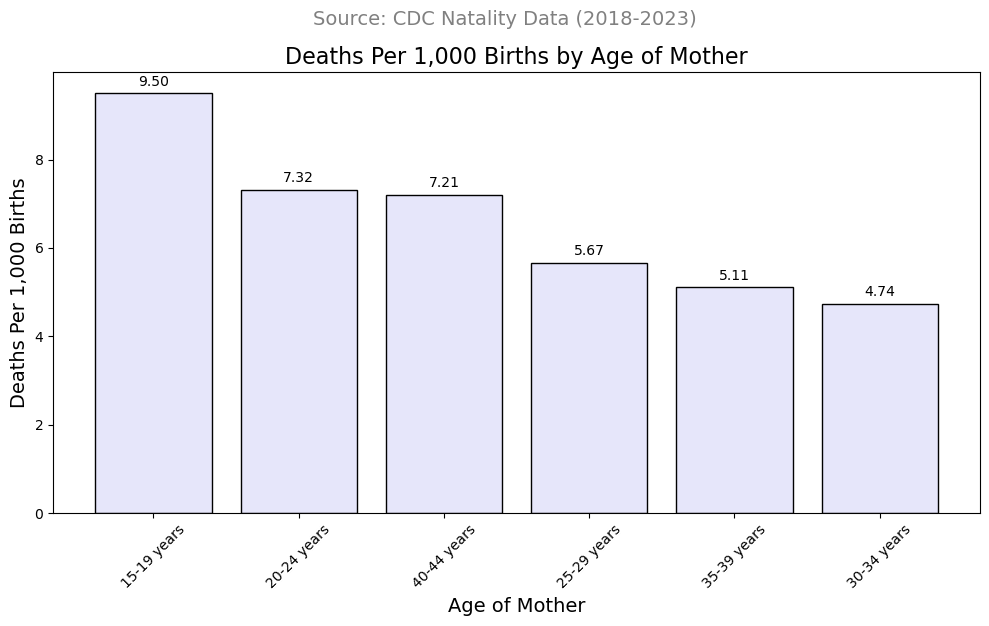

In [186]:
# make bar chart for delivery_age_summary
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
bars=plt.bar(delivery_age_summary["Age of Mother 9"],
             delivery_age_summary["Deaths Per Thousand"],
             color="lavender", edgecolor="black")
#labels 
plt.title("Deaths Per 1,000 Births by Age of Mother", fontsize=16)
plt.xlabel("Age of Mother", fontsize=14)
plt.ylabel("Deaths Per 1,000 Births", fontsize=14)
plt.xticks(rotation=45)


#display
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height() +0.10,
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10)
# add source info
plt.figtext(
    0.51, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)
# Display
plt.tight_layout()
plt.savefig('Final:Deaths Per 1,000 Births by Age of Mother.png')

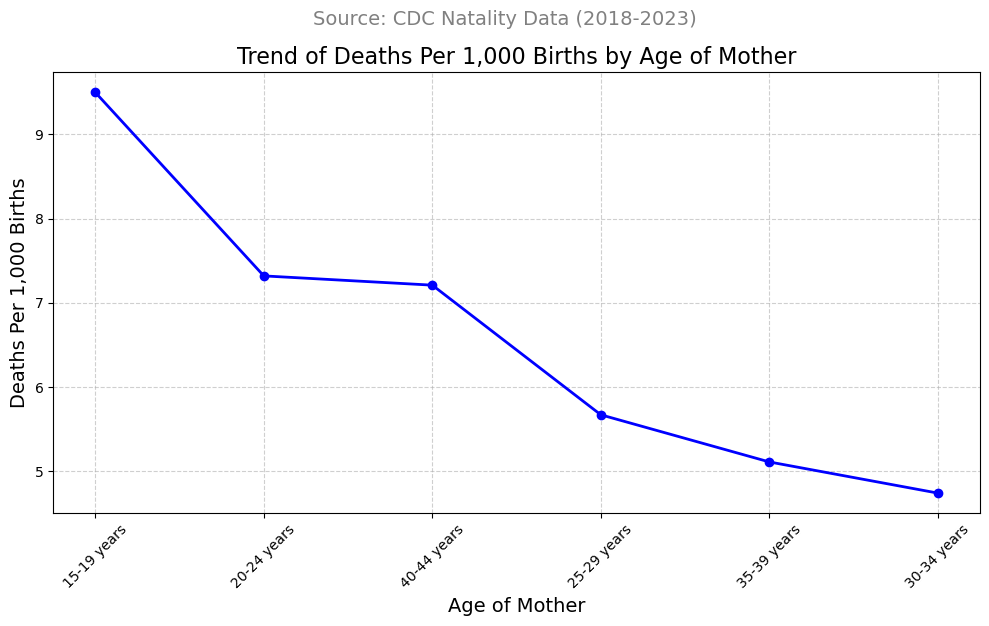

In [181]:
# make line graph for delivery_age_summary
plt.figure(figsize=(10,6))
plt.plot(delivery_age_summary["Age of Mother 9"],
         delivery_age_summary["Deaths Per Thousand"],
         marker='o', color='blue', linewidth=2)
# labels
plt.title("Trend of Deaths Per 1,000 Births by Age of Mother", fontsize=16)
plt.xlabel("Age of Mother", fontsize=14)
plt.ylabel("Deaths Per 1,000 Births", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.60)

# add source info
plt.figtext(
    0.51, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)
# Display
plt.tight_layout()
plt.savefig(' Final Trend of Deaths Per 1,000 Births by Age of Mother.png',bbox_inches='tight')

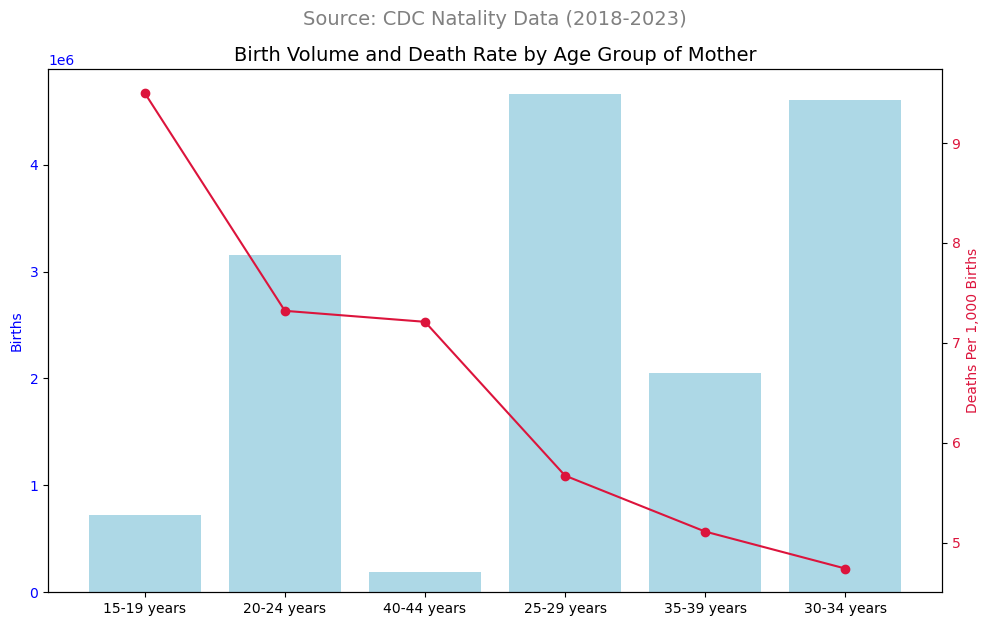

In [187]:
# combo bar and line chart to show births, death rate together and relationship to age
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart to show births
ax1.bar(delivery_age_summary["Age of Mother 9"], 
        delivery_age_summary["Births"], 
        color="lightblue", label="Births")
ax1.set_ylabel("Births", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# line graph to show death rate
ax2 = ax1.twinx()
ax2.plot(delivery_age_summary["Age of Mother 9"], 
         delivery_age_summary["Deaths Per Thousand"], 
         color="crimson", marker="o", label="Death Rate (per 1,000)")
ax2.set_ylabel("Deaths Per 1,000 Births", color="crimson")
ax2.tick_params(axis='y', labelcolor="crimson")

# label 
plt.title("Birth Volume and Death Rate by Age Group of Mother", fontsize=14)
plt.xticks(rotation=45)

# add source info
plt.figtext(
    0.50, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)

# Display
plt.tight_layout()
plt.savefig('Final Birth Volume and Death Rate by Age Group of Mother.png')


In [40]:
# Get sum of births and deaths by Education of Mother for delivery_df
# Does education level affect risk/ rate of infant mortality (death rate)

delivery_edu_summary = delivery_df.groupby("Mother's Education")\
    .agg({"Births": "sum", "Deaths": "sum"})\
    .reset_index()

# death rate by education 
# deaths/births * 1000 CDC data death rate is expressed as per 1 thousand

delivery_edu_summary["Deaths Per Thousand"] = (delivery_edu_summary["Deaths"] /delivery_edu_summary["Births"] * 1000).round(2)

# exculde Unknown or Not Stated under Mother's Education to prevent skewing since we are looking at the affects of education and infant mortatlity
delivery_edu_summary=delivery_edu_summary[
    ~delivery_edu_summary["Mother's Education"].isin(["Unknown or Not Stated"])
]

# sort by Deaths Per thousand

delivery_edu_summary = delivery_edu_summary.sort_values("Deaths Per Thousand", ascending=False)

# show results 
delivery_edu_summary


,Mother's Education,Births,Deaths,Deaths Per Thousand
1,9th through 12th grade with no diploma,1161791,11502,9.90
0,8th grade or less,76375,647,8.47
5,High school graduate or GED completed,4426514,33840,7.64
7,"Some college credit, but not a degree",3337363,20066,6.01
2,"Associate degree (AA, AS)",1300196,6320,4.86
3,"Bachelor's degree (BA, AB, BS)",3416775,11230,3.29
6,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",1382971,3994,2.89
4,"Doctorate (PhD, EdD) or Professional Degree (M...",154940,362,2.34


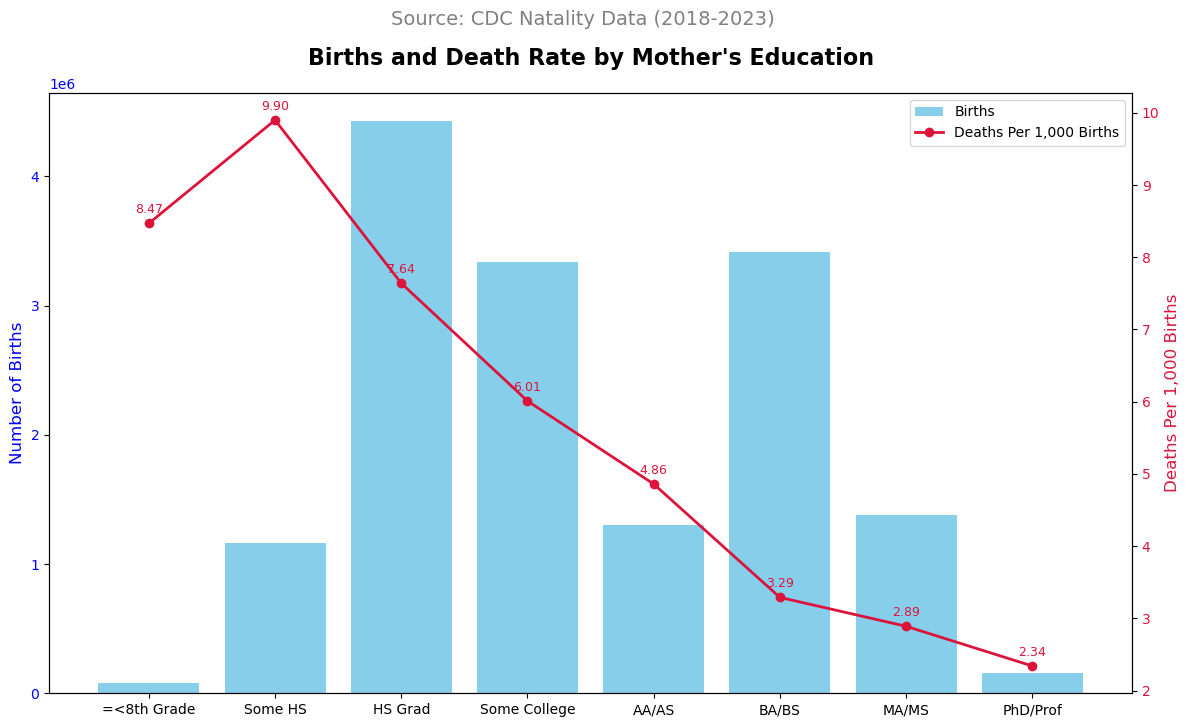

In [166]:
# combo bar and line chart to show births, death rate together and relationship to age


# shorten educational level to fit on plot
rename_edu = {
    "8th grade or less": "=<8th Grade",
    "9th through 12th grade with no diploma":"Some HS" ,
    "High school graduate or GED completed":"HS Grad",
    "Some college credit, but not a degree": "Some College",
    "Associate degree (AA, AS)":"AA/AS",
    "Bachelor's degree (BA, AB, BS)":"BA/BS" ,
    "Master's degree (MA, MS, MEng, MEd, MSW, MBA)":"MA/MS",
    "Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)":"PhD/Prof"
}

#renaming for label
delivery_edu_summary["Mother's Education"] = (
    delivery_edu_summary["Mother's Education"]
    .replace(rename_edu)
    .astype(str)
    
)


# sort dataset per edu_order
edu_order= ["=<8th Grade", "Some HS", "HS Grad", "Some College", "AA/AS", "BA/BS", "MA/MS","PhD/Prof"]

delivery_edu_summary["Mother's Education"] = pd.Categorical(
    delivery_edu_summary["Mother's Education"], 
    categories=edu_order, 
    ordered=True
)
delivery_edu_summary = delivery_edu_summary.sort_values("Mother's Education")

# make double chart (bar and line)
fig, ax1 = plt.subplots(figsize=(12, 7)) 

# Bar chart to show births
bars = ax1.bar(
    delivery_edu_summary["Mother's Education"],
    delivery_edu_summary["Births"],
    color="skyblue",
    label="Births",
    zorder=2,
)
ax1.set_ylabel("Number of Births", color="blue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="blue")


# line graph to show death rate
ax2 = ax1.twinx()
ax2.plot(
    delivery_edu_summary["Mother's Education"],
    delivery_edu_summary["Deaths Per Thousand"],
    color="crimson",
    marker="o",
    linewidth=2,
    label="Deaths Per 1,000 Births"
)
ax2.set_ylabel("Deaths Per 1,000 Births", color="crimson", fontsize=12)
ax2.tick_params(axis='y', labelcolor="crimson")

#title label
plt.title("Births and Death Rate by Mother's Education", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=25, ha='right', fontsize=11) 
plt.subplots_adjust(bottom=0.2)  

#line graph labels ( death rate)
for x, y in zip(delivery_edu_summary["Mother's Education"], delivery_edu_summary["Deaths Per Thousand"]):
    ax2.text(x, y + 0.1, f"{y:.2f}", ha='center', va='bottom', color='crimson', fontsize=9)

# add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right", fontsize=10)

# add source info
plt.figtext(
    0.49, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)

# Display
plt.tight_layout()
plt.savefig(' Final Births and Death Rate by Mother Education.png')

In [136]:
# Sum of deaths by delivery method 
# does delivery method matter for infant mortality (death rate)

deaths_by_delivery = (
    delivery_df.groupby("Delivery Method")
    .agg({"Births": "sum", "Deaths": "sum"})
    .reset_index()
) 

# calculate percentage of deaths per method
# per 1000 is used in CDC wonder data so we will multiply by 1000 instead of 100

deaths_by_delivery["Deaths Per 1000"] = (deaths_by_delivery["Deaths"] /deaths_by_delivery["Births"] * 1000).round(2)

#filter out unknown or not stated to focus on the 2 methods
# note for unknown or Not stated there are 54 births and 33 deaths and deaths per 1000 is 611.11 ( results before applying filter)
method_data = deaths_by_delivery[
    deaths_by_delivery["Delivery Method"] != "Unknown or Not Stated"
].sort_values("Deaths Per 1000", ascending=False)

# Show Results
deaths_by_delivery


,Delivery Method,Births,Deaths,Deaths Per 1000
0,Cesarean,4744917,37691,7.94
1,Unknown or Not Stated,54,33,611.11
2,Vaginal,10652088,52422,4.92


In [137]:
# Show filter remove Unknown or Not Stated method
method_data

,Delivery Method,Births,Deaths,Deaths Per 1000
0,Cesarean,4744917,37691,7.94
2,Vaginal,10652088,52422,4.92


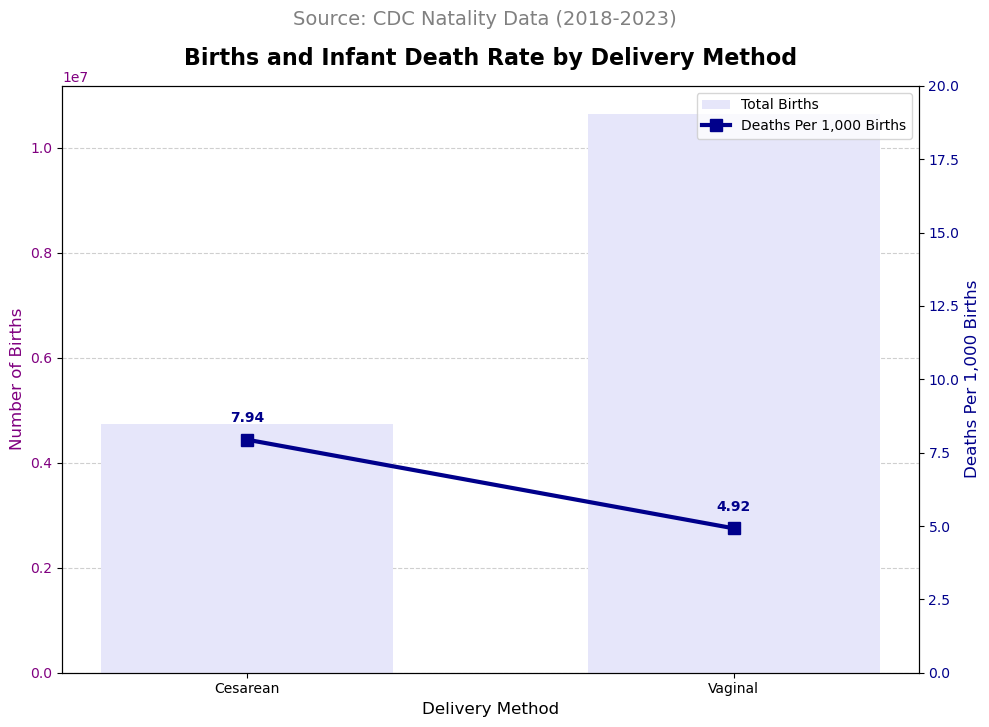

In [188]:
# combo bar and line chart to show births, death rate together and relationship to delivery method

import numpy as np

#ensure datatype for consistency 
method_data["Delivery Method"] = pd.Categorical(
    method_data["Delivery Method"],
    categories=plot_data["Delivery Method"].unique(),
    ordered=True
)

# Make bar and line graph together
fig, ax1 = plt.subplots(figsize=(10, 7))

# Bar graph - Show Births
ax1.bar(
    method_data["Delivery Method"],
    method_data["Births"],
    color="lavender",
    label="Total Births",
    zorder=2,
    width=0.6
)

# bar graph label
ax1.set_ylabel("Number of Births", color="purple", fontsize=12)
ax1.tick_params(axis='y', labelcolor="purple")
ax1.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

# line graph - Show death rate aka per 1000
ax2 = ax1.twinx()
x_pos = np.arange(len(plot_data["Delivery Method"]))
ax2.plot(
    x_pos,
    plot_data["Deaths Per 1000"],
    color="darkblue",
    marker="s",
    linestyle='-',
    linewidth=3,
    markersize=8,
    label="Deaths Per 1,000 Births",
    zorder=3
)

# line graph label
ax2.set_ylabel("Deaths Per 1,000 Births", color="darkblue", fontsize=12)
ax2.tick_params(axis='y', labelcolor="darkblue")
ax2.set_ylim(bottom=0, top=20) # makes y-axis starts at 0 and clearly displays 

# Title label
plt.title(
    "Births and Infant Death Rate by Delivery Method",
    fontsize=16,
    fontweight="bold",
    pad=15,
)
ax1.set_xlabel("Delivery Method", fontsize=12)
plt.xticks(x_pos, plot_data["Delivery Method"], rotation=0, ha='center', fontsize=11)

# label for death rate line
for i, y in enumerate(plot_data["Deaths Per 1000"]):
    ax2.text(
        x_pos[i],
        y + 0.5,
        f"{y:.2f}",
        ha='center',
        va='bottom',
        color='darkblue',
        fontsize=10,
        fontweight='bold'
    )

# legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right", fontsize=10)

# add source info
plt.figtext(
    0.49, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)

# display
plt.tight_layout()
plt.savefig('Final Births and Death Rate Delivery Method.png')

In [145]:
# delivery method by age group and death rate and make plot
# Does age change the risk of delivery method
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# group data from delivery_df by deaths, age and delivery method
deaths_age_delivery = (
    delivery_df.groupby(["Age of Mother 9", "Delivery Method"])
    .agg({"Births": "sum", "Deaths": "sum"})
    .reset_index()
)

# calculate percentage of deaths per method
# per 1000 is used in CDC wonder data so we will multiply by 1000 instead of 100
deaths_age_delivery["Deaths Per 1000"] = (deaths_age_delivery["Deaths"] /deaths_age_delivery["Births"] * 1000).round(2)

#filter out unknown or not stated to focus on the 2 methods of delivery
deaths_age_delivery = deaths_age_delivery[
    deaths_age_delivery["Delivery Method"] != "Unknown or Not Stated"
]

# filter for age aka order age should appear
age_order = [
    "10-14 years", "15-19 years", "20-24 years", "25-29 years",
    "30-34 years", "35-39 years", "40-44 years", "45-49 years",
    "50-54 years"
]
# fitler for age
deaths_age_delivery = deaths_age_delivery[
    deaths_age_delivery["Age of Mother 9"].isin(age_order)
]

# convert data type for consistency in sorting and plot prep
deaths_age_delivery["Age of Mother 9"] = pd.Categorical(
    deaths_age_delivery["Age of Mother 9"], categories=age_order, ordered=True
)

# display 
deaths_age_delivery

,Age of Mother 9,Delivery Method,Births,Deaths,Deaths Per 1000
0,15-19 years,Cesarean,134307,2200,16.38
1,15-19 years,Vaginal,592042,4697,7.93
2,20-24 years,Cesarean,783745,8659,11.05
4,20-24 years,Vaginal,2375053,14456,6.09
5,25-29 years,Cesarean,1375594,11040,8.03
7,25-29 years,Vaginal,3283360,15355,4.68
8,30-34 years,Cesarean,1534430,9795,6.38
9,30-34 years,Vaginal,3070977,12015,3.91
10,35-39 years,Cesarean,813700,5147,6.33
11,35-39 years,Vaginal,1240015,5352,4.32


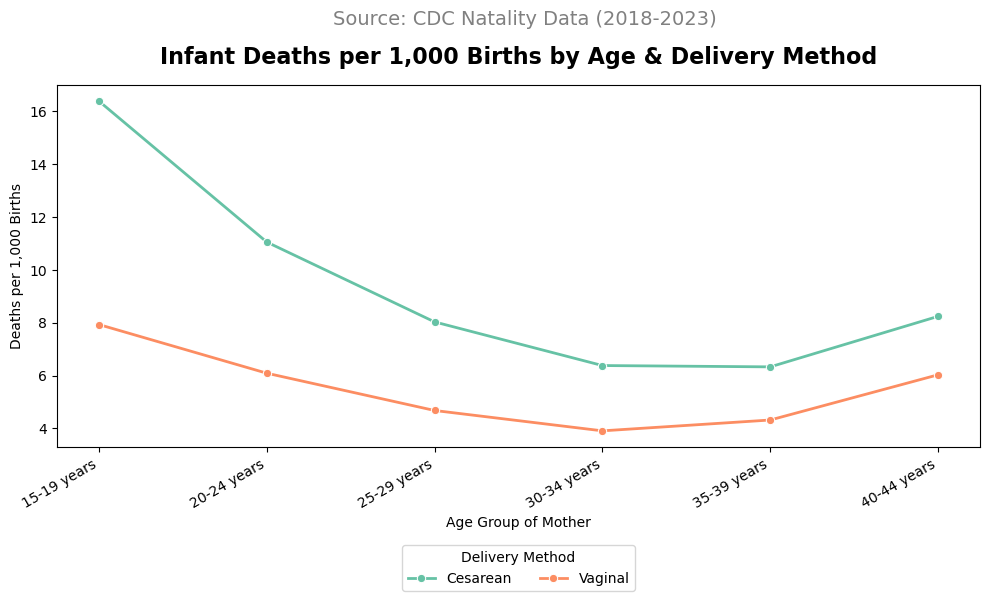

In [168]:
# delivery method by age group and death rate plot


# line graph 
plt.figure(figsize=(10,6))
sns.lineplot(
    data=deaths_age_delivery,
    x="Age of Mother 9",
    y="Deaths Per 1000",
    hue="Delivery Method",
    marker="o",
    linewidth=2,
    palette="Set2"
)
# Titles and labels
plt.title("Infant Deaths per 1,000 Births by Age & Delivery Method", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Age Group of Mother")
plt.ylabel("Deaths per 1,000 Births")
plt.xticks(rotation=30, ha="right")

# legend
plt.legend(title="Delivery Method", bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2)

# add source info
plt.figtext(
    0.53, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)

# display
plt.tight_layout()
plt.savefig('Final Infant Deaths per 1,000 Births by Age and Delivery Method.png')

In [62]:
# Summary of data births
# we have 12 columns and 15,049 rows of data for births_df
births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15049 entries, 0 to 15048
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State of Residence                            15049 non-null  object 
 1   State of Residence Code                       15049 non-null  int64  
 2   Age of Mother 9                               15049 non-null  object 
 3   Age of Mother 9 Code                          15049 non-null  object 
 4   Mother's Education                            15049 non-null  object 
 5   Mother's Education Code                       15049 non-null  object 
 6   Year                                          15049 non-null  int64  
 7   Year Code                                     15049 non-null  int64  
 8   Births                                        15049 non-null  int64  
 9   % of Total Births                             15049 non-null 

In [63]:
# check for duplicate rows
births_duplicates = births_df[births_df.duplicated()]

# show the duplicate rows
print(f"number of duplicate rows: {births_duplicates.shape[0]}")

# results no duplicate rows found in births_df

number of duplicate rows: 0


In [64]:
# Check for missing values in births_df
births_df.isnull().sum()

# results no missing data in births_df

State of Residence                              0
State of Residence Code                         0
Age of Mother 9                                 0
Age of Mother 9 Code                            0
Mother's Education                              0
Mother's Education Code                         0
Year                                            0
Year Code                                       0
Births                                          0
% of Total Births                               0
Average Age of Mother (years)                   0
Standard Deviation for Average Age of Mother    0
dtype: int64

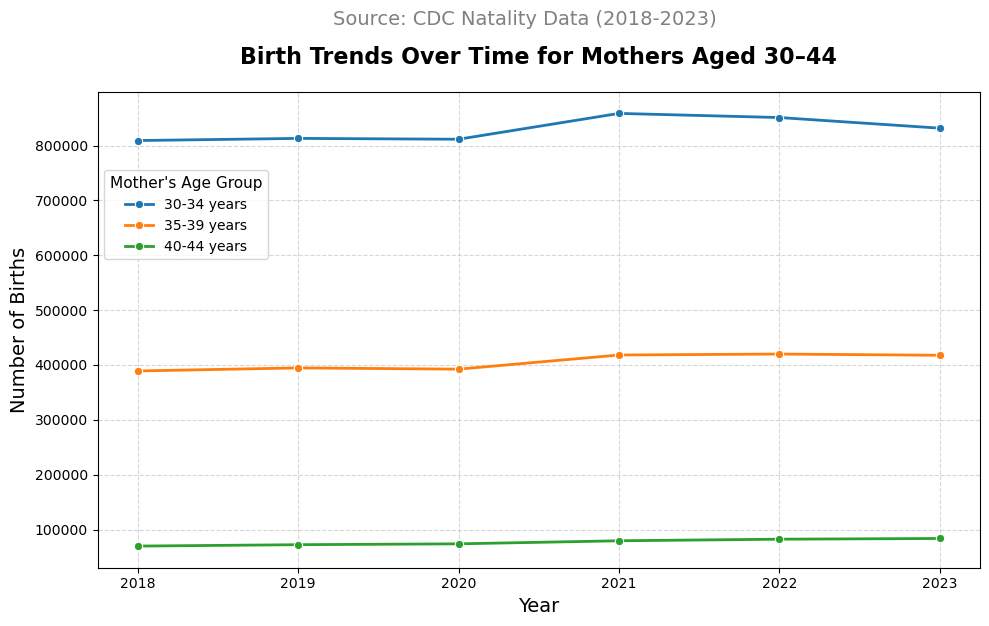

In [182]:
# was there an increase in women 30 and older giving birth betweeen 2018-2023 (births-df)

import seaborn as sns

# filter to mothers 30 and older
selected_ages = ["30-34 years", "35-39 years", "40-44 years"]
births_filtered = births_df[births_df["Age of Mother 9"].isin(selected_ages)]

# group by year and age
births_by_year = (
    births_filtered.groupby(["Year", "Age of Mother 9"])["Births"]
    .sum()
    .reset_index()
)

# plot the trend over 2018 -2023
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=births_by_year,
    x="Year",
    y="Births",
    hue="Age of Mother 9",
    marker="o",
    linewidth=2
)

# Label and title
plt.title("Birth Trends Over Time for Mothers Aged 30–44", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Births", fontsize=14)
plt.legend(title="Mother's Age Group", title_fontsize=11, fontsize=10, loc="upper left", bbox_to_anchor=(0,0.85))
plt.grid(True, linestyle="--", alpha=0.5)

# add source info
plt.figtext(
    0.53, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)

# display
plt.tight_layout()
plt.savefig('Final Birth Trends Over Time for Mothers Age 30 to 44.png',bbox_inches='tight')

In [69]:
# are women with higher education giving birth more as compared to lower education level ?
births_30plus = births_df[births_df["Age of Mother 9"].isin(["30-34 years", "35-39 years", "40-44 years"])]

# group by education and births
edu_births_30plus = (
    births_30plus.groupby("Mother's Education")["Births"]
    .sum()
    .reset_index()
    .sort_values("Births", ascending=False)
)

# shorten educational level to fit on plot
rename_edu = {
    "8th grade or less": "=<8th Grade",
    "9th through 12th grade with no diploma":"Some HS" ,
    "High school graduate or GED completed":"HS Grad",
    "Some college credit, but not a degree": "Some College",
    "Associate degree (AA, AS)":"AA/AS",
    "Bachelor's degree (BA, AB, BS)":"BA/BS" ,
    "Master's degree (MA, MS, MEng, MEd, MSW, MBA)":"MA/MS",
    "Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)":"PhD/Prof"
}
edu_births_30plus = (
    births_30plus.groupby("Mother's Education")["Births"]
    .sum()
    .reset_index()
    .sort_values("Births", ascending=False)
)
#replace Mother's Education with abbreviations 
edu_births_30plus["Mother's Education"] = (
    edu_births_30plus["Mother's Education"].replace(rename_edu)
)

/var/folders/jc/3hys68793zdd7cqh0b6gp37c0000gn/T/ipykernel_47806/1573702290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


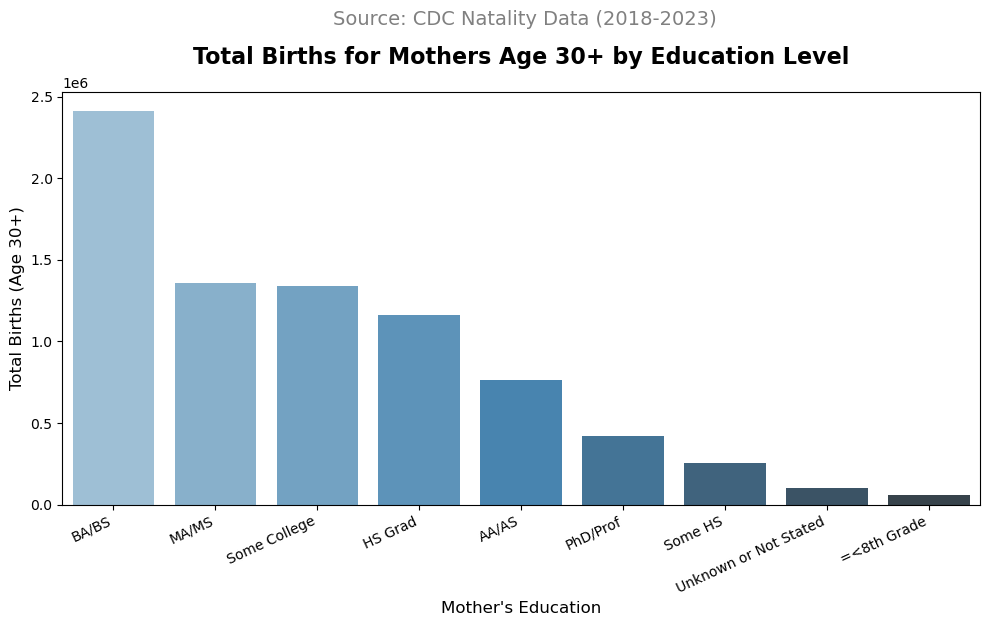

In [173]:
# make chart edu_births_30plus, are mothers in this range more educated
plt.figure(figsize=(10, 6))
sns.barplot(
    data=edu_births_30plus,
    x="Mother's Education",
    y="Births",
    palette="Blues_d"
)

#labels
plt.title("Total Births for Mothers Age 30+ by Education Level", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Mother's Education", fontsize=12)
plt.ylabel("Total Births (Age 30+)", fontsize=12)
plt.xticks(rotation=25, ha='right')

# add source info
plt.figtext(
    0.53, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)
# Display
plt.tight_layout()
plt.savefig('Final Total Births for Mothers Age 30 and up by Education Level.png')

In [147]:
# are women with higher education giving birth more as compared to lower education level ?
births_29low = births_df[births_df["Age of Mother 9"].isin(["Under 15 years", "15-19 years", "20-24 years", "25-29 years"])]

# group by education and births
edu_births_29low = (
    births_30plus.groupby("Mother's Education")["Births"]
    .sum()
    .reset_index()
    .sort_values("Births", ascending=False)
)

# shorten educational level to fit on plot
rename_edu = {
    "8th grade or less": "=<8th Grade",
    "9th through 12th grade with no diploma":"Some HS" ,
    "High school graduate or GED completed":"HS Grad",
    "Some college credit, but not a degree": "Some College",
    "Associate degree (AA, AS)":"AA/AS",
    "Bachelor's degree (BA, AB, BS)":"BA/BS" ,
    "Master's degree (MA, MS, MEng, MEd, MSW, MBA)":"MA/MS",
    "Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)":"PhD/Prof"
}
edu_births_29low = (
    births_29low.groupby("Mother's Education")["Births"]
    .sum()
    .reset_index()
    .sort_values("Births", ascending=False)
)
#replace Mother's Education with abbreviations 
edu_births_29low["Mother's Education"] = (
    edu_births_29low["Mother's Education"].replace(rename_edu)
)

/var/folders/jc/3hys68793zdd7cqh0b6gp37c0000gn/T/ipykernel_47806/3918615395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


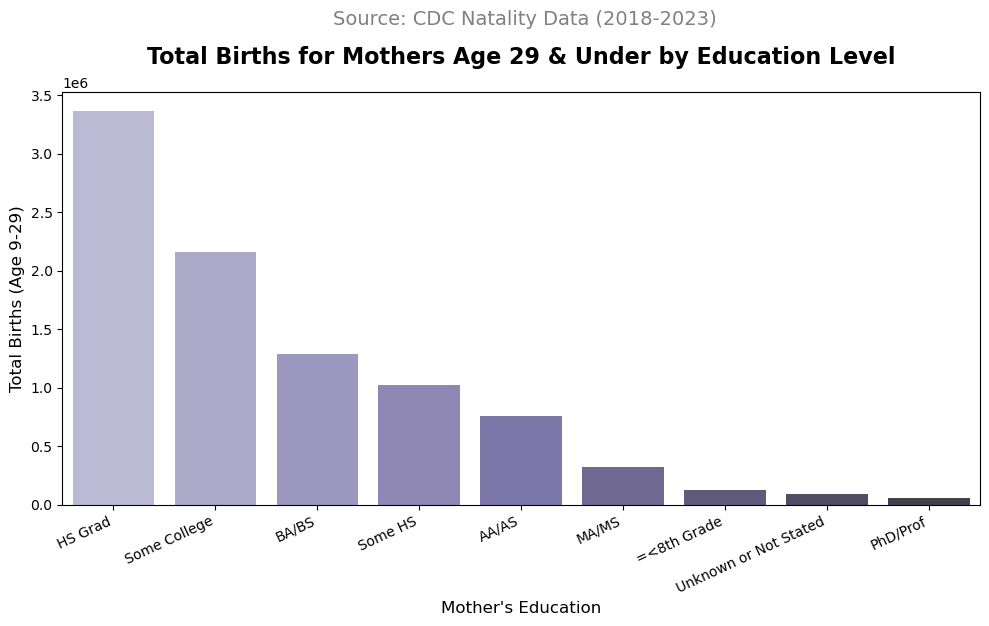

In [180]:
# make chart edu_births_29low, are mothers in this range more educated
plt.figure(figsize=(10, 6))
sns.barplot(
    data=edu_births_29low,
    x="Mother's Education",
    y="Births",
    palette="Purples_d"
)

#labels
plt.title("Total Births for Mothers Age 29 & Under by Education Level", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Mother's Education", fontsize=12)
plt.ylabel("Total Births (Age 9-29)", fontsize=12)
plt.xticks(rotation=25, ha='right')

# add source info
plt.figtext(
    0.53, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)
# Display
plt.tight_layout()
plt.savefig('Final Total Births for Mothers Age 29 and under by Education Level.png',bbox_inches='tight')

In [172]:
# Summary of data diabetes
# we have 12 columns and 4221 rows of data for delivery_df
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4221 entries, 0 to 4220
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   State of Residence                                            4220 non-null   object 
 1   State of Residence Code                                       4220 non-null   float64
 2   Age of Mother 9                                               4220 non-null   object 
 3   Age of Mother 9 Code                                          4220 non-null   object 
 4   Mother's Education                                            4220 non-null   object 
 5   Mother's Education Code                                       4220 non-null   object 
 6   Gestational Diabetes                                          4220 non-null   object 
 7   Gestational Diabetes Code                                     4220 non-nul

In [72]:
# check for duplicate rows
diabetes_duplicates = diabetes_df[diabetes_df.duplicated()]

# show the duplicate rows
print(f"number of duplicate rows: {diabetes_duplicates.shape[0]}")

# results 46 duplicate rows found in diabetes_df

number of duplicate rows: 46


In [73]:
# Show all duplicate rows (including both copies)
duplicates = diabetes_df[diabetes_df.duplicated(keep=False)]

# Display them sorted for easier review
duplicates.sort_values(by=diabetes_df.columns.tolist(), inplace=True)

# Show the duplicates
display(duplicates)

/var/folders/jc/3hys68793zdd7cqh0b6gp37c0000gn/T/ipykernel_47806/1522867150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates.sort_values(by=diabetes_df.columns.tolist(), inplace=True)


,State of Residence,State of Residence Code,Age of Mother 9,Age of Mother 9 Code,Mother's Education,Mother's Education Code,Gestational Diabetes,Gestational Diabetes Code,Births,Average Age of Mother (years),Average OE Gestational Age (weeks),Average Birth Weight (grams),Average Pre-pregnancy BMI,Average Number of Prenatal Visits,Average Interval Since Last Other Pregnancy Outcome (months)
4220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# all 46 duplicate rows all had NaN for all columns, so I made the decision to remove them since there are no values lost

# Remove duplicate rows
diabetes_df = diabetes_df.drop_duplicates()

# Confirm it worked
print(f"After removing duplicates, dataset has {diabetes_df.shape[0]} rows.")

After removing duplicates, dataset has 4221 rows.


In [77]:
# diabetes relationship to age , do older mothers aka advanced maternal age have higher rates of diabetes

# create filter by age, order age should appear
age_order_filtered = [
    'Under 15 years', '15-19 years', '20-24 years', '25-29 years',
    '30-34 years', '35-39 years', '40-44 years', '45-49 years'
]

# Sum of births group by age and gestational diabetes diagnosis 
age_diabetes_summary = diabetes_df.groupby(
    ['Age of Mother 9', 'Gestational Diabetes']
)['Births'].sum().unstack(fill_value=0)

# total births (aggregated) and and gestational diabetes diagnosis as percenatage
age_diabetes_summary['Group Total Births'] = age_diabetes_summary['Yes'] + age_diabetes_summary['No']

age_diabetes_summary['Diabetes Rate (%)'] = ( age_diabetes_summary['Yes'] / age_diabetes_summary['Group Total Births']) * 100

# sort by age group
age_diabetes_summary = age_diabetes_summary.reindex(age_order_filtered)

# show results 
age_diabetes_summary


Gestational Diabetes,No,Unknown or Not Stated,Yes,Group Total Births,Diabetes Rate (%)
Age of Mother 9,,,,,
Under 15 years,1050.0,0.0,0.0,1050.0,0.000000
15-19 years,109015.0,209.0,2600.0,111615.0,2.329436
20-24 years,469846.0,799.0,23214.0,493060.0,4.708149
25-29 years,713669.0,1111.0,54164.0,767833.0,7.054138
30-34 years,760484.0,1117.0,70811.0,831295.0,8.518155
35-39 years,383397.0,443.0,44925.0,428322.0,10.488604
40-44 years,74980.0,63.0,10733.0,85713.0,12.522021
45-49 years,3526.0,0.0,227.0,3753.0,6.048495


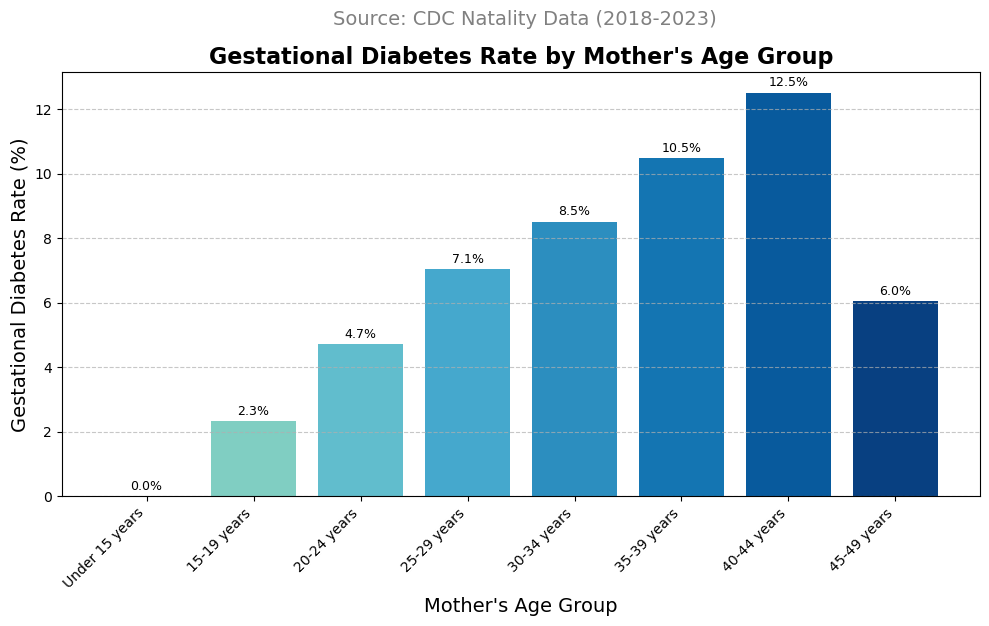

In [189]:
#count number of age groups aka number of rows in aggregated data (age_diabetes)
num_bars = len(age_diabetes_summary)

# make bar graph with gradient
# add colors : green to blue
colors = plt.cm.GnBu(np.linspace(0.4, 1, num_bars))

# chart type & size and data
plt.figure(figsize=(10, 6))
bars = plt.bar(
    age_diabetes_summary.index,
    age_diabetes_summary['Diabetes Rate (%)'],
    color=colors
)

# labels
plt.ylabel('Gestational Diabetes Rate (%)', fontsize=14)
plt.xlabel('Mother\'s Age Group', fontsize=14)
plt.title('Gestational Diabetes Rate by Mother\'s Age Group', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# layout + data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval + 0.1,
        f'{yval:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )
# add source info
plt.figtext(
    0.53, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)
# display
plt.tight_layout()
plt.savefig('Final Diabetes_rate_by_age.png')

In [80]:
# diabetes relationship to education level

# renaming mother's education ( so that it fits on plot) 
edu_order = [
    "=<8th Grade", "Some HS", "HS Grad", "Some College",
    "AA/AS", "BA/BS", "MA/MS", "PhD/Prof"
]
rename_edu = {
    "8th grade or less": "=<8th Grade",
    "9th through 12th grade with no diploma": "Some HS",
    "High school graduate or GED completed": "HS Grad",
    "Some college credit, but not a degree": "Some College",
    "Associate degree (AA, AS)": "AA/AS",
    "Bachelor's degree (BA, AB, BS)": "BA/BS",
    "Master's degree (MA, MS, MEng, MEd, MSW, MBA)": "MA/MS",
    "Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)": "PhD/Prof"
}

# Apply abbreviations for mother's education
diabetes_df['Education Level'] = diabetes_df['Mother\'s Education'].replace(rename_edu)

# Group by Education and Diabetes status
edu_diabetes_summary = diabetes_df.groupby(
    ['Education Level', 'Gestational Diabetes']
)['Births'].sum().unstack(fill_value=0)

# Calculate aggreated Total Births and Diabetes Rate (%)
edu_diabetes_summary['Group Total Births'] = edu_diabetes_summary['Yes'] + edu_diabetes_summary['No']
edu_diabetes_summary['Diabetes Rate (%)'] = (edu_diabetes_summary['Yes'] / edu_diabetes_summary['Group Total Births']) * 100

# Sort by education
edu_diabetes_summary = edu_diabetes_summary.reindex(edu_order)

# show results

edu_diabetes_summary

/var/folders/jc/3hys68793zdd7cqh0b6gp37c0000gn/T/ipykernel_47806/458586803.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df['Education Level'] = diabetes_df['Mother\'s Education'].replace(rename_edu)


Gestational Diabetes,No,Unknown or Not Stated,Yes,Group Total Births,Diabetes Rate (%)
Education Level,,,,,
=<8th Grade,28297.0,62.0,729.0,29026.0,2.511541
Some HS,166996.0,226.0,10552.0,177548.0,5.943182
HS Grad,683359.0,900.0,54430.0,737789.0,7.377448
Some College,455268.0,418.0,43008.0,498276.0,8.631361
AA/AS,216746.0,51.0,21895.0,238641.0,9.174869
BA/BS,584427.0,406.0,46942.0,631369.0,7.434955
MA/MS,268924.0,99.0,21673.0,290597.0,7.458095
PhD/Prof,79741.0,0.0,5633.0,85374.0,6.598028


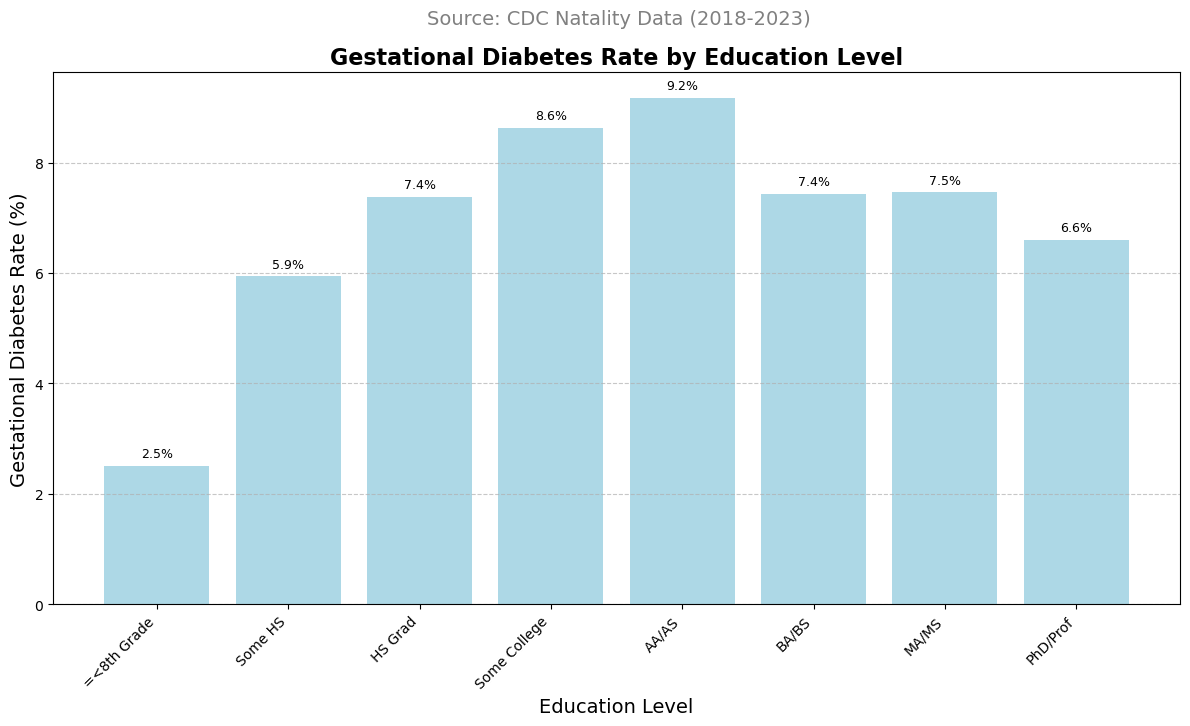

In [176]:
# bar chart diabetes relationships to age 
# chart type & size and data
plt.figure(figsize=(12, 7))
bars = plt.bar(
    edu_diabetes_summary.index,
    edu_diabetes_summary['Diabetes Rate (%)'],
    color='lightblue'
)

# labels
plt.ylabel('Gestational Diabetes Rate (%)', fontsize=14)
plt.xlabel('Education Level', fontsize=14)
plt.title('Gestational Diabetes Rate by Education Level', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# layout + data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval + 0.1,
        f'{yval:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )
# add source info
plt.figtext(
    0.52, 1.01, 
     "Source: CDC Natality Data (2018-2023)",
    ha='center',
    fontsize=14, 
    color="gray",
)
# display
plt.tight_layout()
plt.savefig('Final diabetes_rate_by_education.png')

# results education and diabetes outcomes maybe related to age rather than education level

In [87]:
# Summary of data fertility 
# we have 13 columns and 3281 rows of data for fertility_df
fertility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State of Residence             3281 non-null   object
 1   State of Residence Code        3281 non-null   int64 
 2   Mother's Hispanic Origin       3281 non-null   object
 3   Mother's Hispanic Origin Code  3281 non-null   object
 4   Mother's Single Race 6         3281 non-null   object
 5   Mother's Single Race 6 Code    3281 non-null   object
 6   Age of Mother 9                3281 non-null   object
 7   Age of Mother 9 Code           3281 non-null   object
 8   Year                           3281 non-null   int64 
 9   Year Code                      3281 non-null   int64 
 10  Births                         3281 non-null   int64 
 11  Female Population              3281 non-null   object
 12  Fertility Rate                 3281 non-null   object
dtypes: 

In [88]:
# check for duplicate rows
fertility_duplicates = fertility_df[fertility_df.duplicated()]

# show the duplicate rows
print(f"number of duplicate rows: {fertility_duplicates.shape[0]}")

# results no duplicate rows found in fertility_df

number of duplicate rows: 0


In [89]:
# Check for missing values in fertility_df
fertility_df.isnull().sum()

# results no missing data in fertility_df

State of Residence               0
State of Residence Code          0
Mother's Hispanic Origin         0
Mother's Hispanic Origin Code    0
Mother's Single Race 6           0
Mother's Single Race 6 Code      0
Age of Mother 9                  0
Age of Mother 9 Code             0
Year                             0
Year Code                        0
Births                           0
Female Population                0
Fertility Rate                   0
dtype: int64

In [93]:
# numeric columns has 'Not Available ' change to NaN
cols_to_numeric = ['Births', 'Female Population', 'Fertility Rate']
for col in cols_to_numeric:

# Coercing errors: change non-numeric values into NaN
    fertility_df[col] = pd.to_numeric(fertility_df[col], errors='coerce')

# Drop rows where key analysis columns or the weighted average components are missing aka listed as not available or unknown/ Not Stated
fertility_df.dropna(subset=['Age of Mother 9', 'Mother\'s Single Race 6', 'State of Residence', 'Fertility Rate', 'Female Population'], inplace=True)

# Weighted Avg Numerator = Rate * Weight (Female Population)
# checked via excel that none of the female population  is listed as 0
fertility_df['Rate_x_Pop'] = fertility_df['Fertility Rate'] * fertility_df['Female Population']


# which Age Group has the Highest Fertility Rate

# filter for age aka order age should appear
age_order = [
    "10-14 years", "15-19 years", "20-24 years", "25-29 years",
    "30-34 years", "35-39 years", "40-44 years", "45-49 years",
    "50-54 years"
]

# sum of fertility weighted
fertility_summary = fertility_df.groupby('Age of Mother 9').agg(Total_Pop=('Female Population', 'sum'), Total_Rate_x_Pop=('Rate_x_Pop', 'sum'))
fertility_summary['Weighted Fertility Rate'] = fertility_summary['Total_Rate_x_Pop'] / fertility_summary['Total_Pop']

# Sort by age order
fertility_summary = fertility_summary.reindex([age for age in age_order if age in fertility_summary.index])

# show results 
fertility_summary

,Total_Pop,Total_Rate_x_Pop,Weighted Fertility Rate
Age of Mother 9,,,
15-19 years,10783623.0,1.355220e+08,12.567389
20-24 years,10951113.0,6.072778e+08,55.453524
25-29 years,11059403.0,9.828276e+08,88.868051
30-34 years,11856389.0,1.100631e+09,92.830235
35-39 years,11446650.0,6.136178e+08,53.606756
40-44 years,11014238.0,1.381851e+08,12.546044


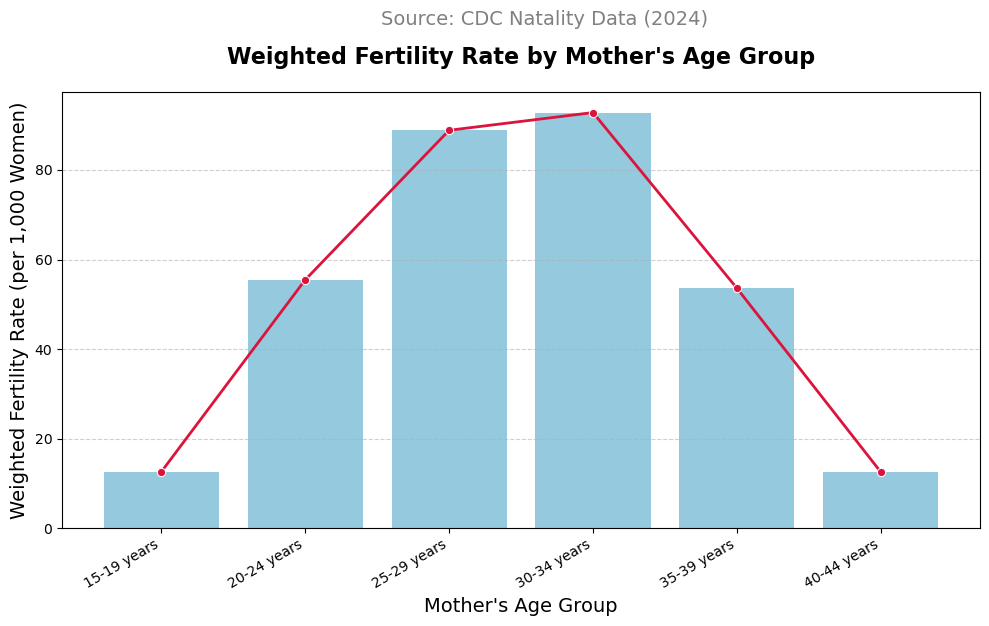

In [177]:
# bar and line chart combo to show fertility rate for each age group base on feritle female population (age 15-44) as per CDC data notes

# bar chart fertility rate by age
plt.figure(figsize=(10,6))
sns.barplot(
    x=fertility_summary.index,
    y=fertility_summary['Weighted Fertility Rate'],
    color='skyblue'
)

#line plot to show fertility across age groups
sns.lineplot(
    x=fertility_summary.index,
    y=fertility_summary['Weighted Fertility Rate'],
    color='crimson',
    marker='o',
    linewidth=2
)

# labels
plt.title("Weighted Fertility Rate by Mother's Age Group", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Mother's Age Group", fontsize=14)
plt.ylabel("Weighted Fertility Rate (per 1,000 Women)", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# add source info
plt.figtext(
    0.55, 1.01, 
     "Source: CDC Natality Data (2024)",
    ha='center',
    fontsize=14, 
    color="gray",
)
# display
plt.tight_layout()
plt.savefig('Final Weighted Fertility Rate by Mother Age Group.png')

In [100]:
# Weighted fertility rate by Age and Mother's Race, are woman of a particular race have higher fertility rate at AMA
fertility_age_race_summary = (
    fertility_df.groupby(["Age of Mother 9", "Mother's Single Race 6"])
    .agg(
        Total_Pop=('Female Population', 'sum'),
        Total_Rate_x_Pop=('Rate_x_Pop', 'sum')
    )
    .reset_index()
)

# Calculate weighted fertility rate
fertility_age_race_summary["Weighted Fertility Rate"] = (
    fertility_age_race_summary["Total_Rate_x_Pop"] / fertility_age_race_summary["Total_Pop"]
)

# Sort to see highest fertility rates
top_fertility = fertility_age_race_summary.sort_values("Weighted Fertility Rate", ascending=False)

# Display top 10 combinations
top_fertility.head(10)

,Age of Mother 9,Mother's Single Race 6,Total_Pop,Total_Rate_x_Pop,Weighted Fertility Rate
16,25-29 years,Native Hawaiian or Other Pacific Islander,29347.0,3.948996e+06,134.562179
10,20-24 years,Native Hawaiian or Other Pacific Islander,29228.0,3.180994e+06,108.833774
22,30-34 years,Native Hawaiian or Other Pacific Islander,32699.0,3.266020e+06,99.881355
23,30-34 years,White,8373814.0,8.216870e+08,98.125780
19,30-34 years,Asian,990877.0,9.614550e+07,97.030716
17,25-29 years,White,7889378.0,7.529968e+08,95.444383
14,25-29 years,Black or African American,1684639.0,1.410860e+08,83.748512
20,30-34 years,Black or African American,1904149.0,1.429048e+08,75.049168
21,30-34 years,More than one race,379604.0,2.845422e+07,74.957635
15,25-29 years,More than one race,427608.0,3.120137e+07,72.967222


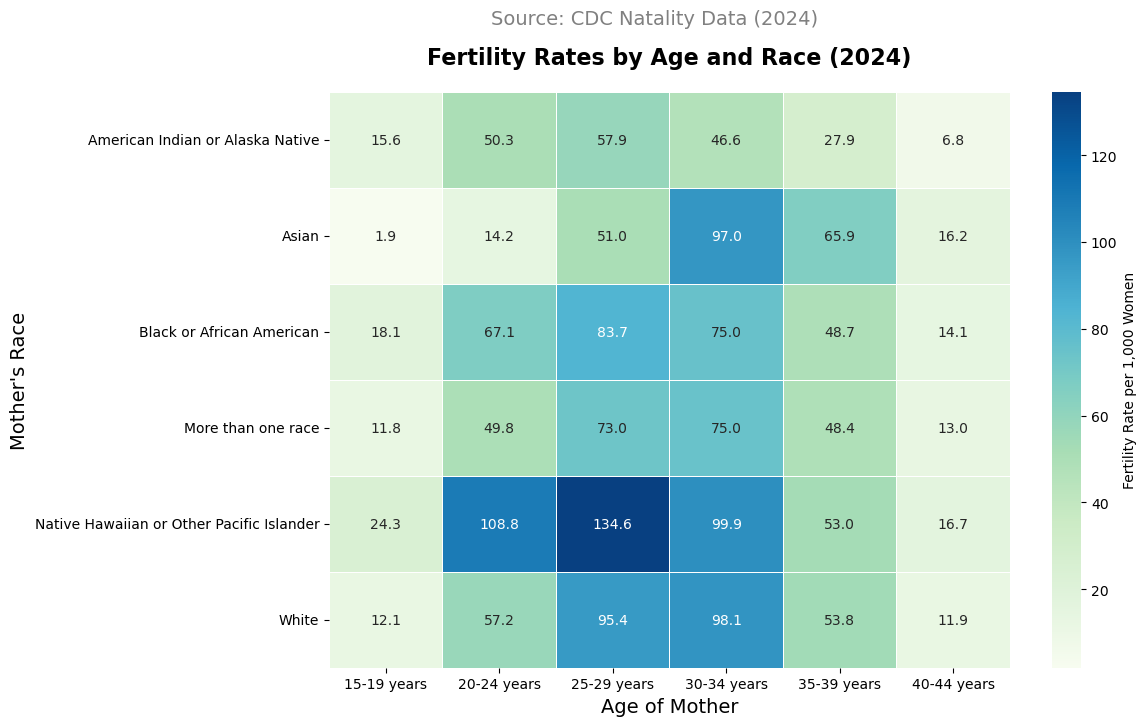

In [184]:


#  heatmap base on age and race/ fertility_age_race_summary
fertility_heatmap = fertility_age_race_summary.pivot(
    index="Mother's Single Race 6",
    columns="Age of Mother 9",
    values="Weighted Fertility Rate"
)

# Sort by age range
age_order = [
    "10-14 years", "15-19 years", "20-24 years", "25-29 years",
    "30-34 years", "35-39 years", "40-44 years", "45-49 years", "50-54 years"
]

fertility_heatmap = fertility_heatmap.reindex(columns=[age for age in age_order if age in fertility_heatmap.columns])

#  heatmap build 
plt.figure(figsize=(12, 7))
sns.heatmap(
    fertility_heatmap,
    cmap="GnBu", # color options YlOrBr, GnBu, YlOrRd
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Fertility Rate per 1,000 Women"}
)

# labels
plt.title("Fertility Rates by Age and Race (2024)", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Age of Mother", fontsize=14)
plt.ylabel("Mother's Race", fontsize=14)

# add source info
plt.figtext(
    0.55, 1.01, 
     "Source: CDC Natality Data (2024)",
    ha='center',
    fontsize=14, 
    color="gray",
)

# Display
plt.tight_layout()
plt.savefig('Final Fertility Rates by Age and Race.png',bbox_inches='tight')

In [190]:
# Get sum of births and deaths by State for delivery_df

delivery_state_summary = (
    delivery_df.groupby("State")[["Births", "Deaths"]]
                        .sum()
                        .reset_index()
                        .sort_values("State")
)

# calculate percentage of deaths per State

delivery_state_summary["Deaths Per thousand"] = (delivery_state_summary["Deaths"] /delivery_state_summary["Births"] * 1000).round(2)

# show results 
delivery_state_summary

# we have data from 51 states ( inculdes D.C)

,State,Births,Deaths,Deaths Per thousand
0,Alabama,297111,2190,7.37
1,Alaska,21699,152,7.00
2,Arizona,348234,1915,5.50
3,Arkansas,161581,1290,7.98
4,California,1673090,7181,4.29
5,Colorado,266717,1217,4.56
6,Connecticut,103737,491,4.73
7,Delaware,12608,126,9.99
8,District of Columbia,10401,121,11.63
9,Florida,847682,5399,6.37


In [191]:
# to prep map creation  

# Dictionary for converting full state names to abbreviations, so that map will work properly since dataset includes full state name 

# This dictionary is to allow python to recognize state via abbreviations of state for map buildling 
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
# Add abbreviation column to your dataframe
delivery_state_summary["State_Code"] = delivery_state_summary["State"].map(us_state_abbrev)



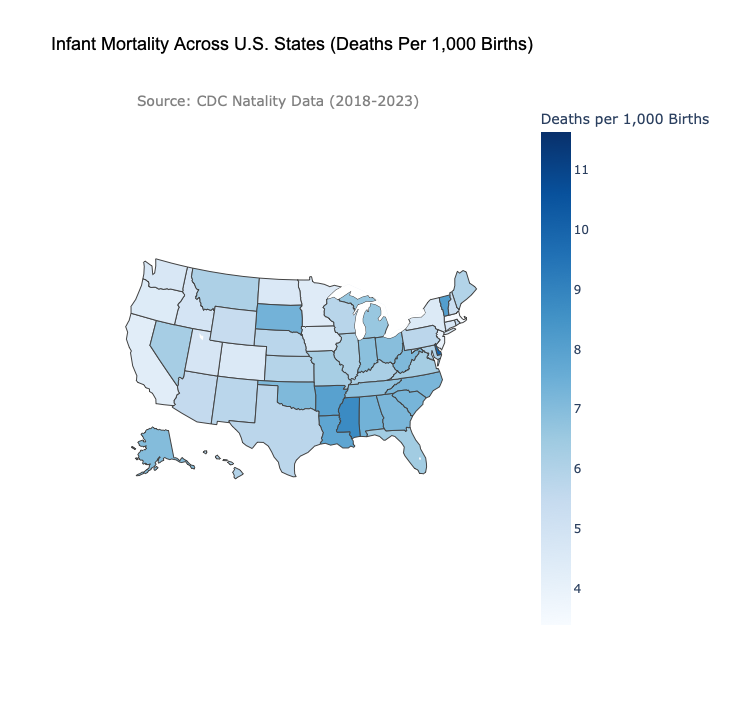

In [197]:
# create 3 layer map 1. shows births, 2 show deaths, 3 shows death rate aka per thousands

import plotly.express as px


# make a Choropleth map to show Deaths Per Thousand ---
fig = px.choropleth(
    delivery_state_summary,
    locations="State_Code",
    locationmode="USA-states",
    color="Deaths Per thousand",
    hover_name="State",
    hover_data={
        "Births": True,
        "Deaths": True,
        "Deaths Per thousand": True
    },
    color_continuous_scale="blues",
    scope="usa",
    title="Infant Mortality Across U.S. States (Deaths Per 1,000 Births)"
)

fig.update_layout(
    width=1200,
    height=700,
    geo=dict(showframe=False, showcoastlines=False),
    title_x=0.40,
    title_font=dict(size=18, family="Arial", color="black"),
    coloraxis_colorbar=dict(title="Deaths per 1,000 Births"),
)
# add source info

fig.add_annotation(
    text="Source: CDC Natality Data (2018-2023)",
    xref="paper", yref="paper",
    x=0.45, y=1.02,  # just below title
    showarrow=False,
    font=dict(size=14, color="gray"),
    xanchor="center"
)
# Save the figure as an HTML file 
fig.write_html("Final_Infant_Mortality_Map.html")

# display
fig